In [1]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/statds/ids-s22/main/notes/data/nyc_DobJobApp_2021.csv'

nyc_jobs = pd.read_csv(url)

/Users/Ryan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (20,24,25,26,27,29,31,52,66,68,74,75,76,77,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
0,440673512,1,QUEENS,10040,222 STREET,10780.0,19.0,4231025,A2,R,...,N,NaN,A1,0,40.714365,-73.731171,27.0,568.0,Queens Village,4231025.0
1,440673497,1,QUEENS,215-02,93 AVENUE,10618.0,28.0,4226672,A2,X,...,N,NaN,A1,0,40.720067,-73.742696,23.0,542.0,Queens Village,4226672.0
2,340810910,1,BROOKLYN,39,RUTLAND ROAD,5034.0,90.0,3115124,A2,R,...,N,NaN,B3,0,40.658878,-73.959067,40.0,79801.0,Prospect Lefferts Gardens-Wingate,3115124.0
3,340810956,1,BROOKLYN,200,LINCOLN ROAD,5029.0,18.0,3114725,A2,X,...,N,NaN,A5,0,40.661240,-73.955847,40.0,800.0,Prospect Lefferts Gardens-Wingate,3114725.0
4,340810947,1,BROOKLYN,770,RUGBY ROAD,6688.0,34.0,3178977,A2,X,...,N,NaN,A1,0,40.630504,-73.963353,45.0,528.0,Flatbush,3178977.0


In [11]:
nyc_jobs.head()

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN,days_to_approve,prof_cert_bin
0,440673512,1,QUEENS,10040,222 STREET,10780.0,19.0,4231025,A2,R,...,A1,0,40.714365,-73.731171,27.0,568.0,Queens Village,4231025.0,0.0,1
1,440673497,1,QUEENS,215-02,93 AVENUE,10618.0,28.0,4226672,A2,X,...,A1,0,40.720067,-73.742696,23.0,542.0,Queens Village,4226672.0,0.0,1
2,340810910,1,BROOKLYN,39,RUTLAND ROAD,5034.0,90.0,3115124,A2,R,...,B3,0,40.658878,-73.959067,40.0,79801.0,Prospect Lefferts Gardens-Wingate,3115124.0,6.0,0
3,340810956,1,BROOKLYN,200,LINCOLN ROAD,5029.0,18.0,3114725,A2,X,...,A5,0,40.661240,-73.955847,40.0,800.0,Prospect Lefferts Gardens-Wingate,3114725.0,5.0,0
4,340810947,1,BROOKLYN,770,RUGBY ROAD,6688.0,34.0,3178977,A2,X,...,A1,0,40.630504,-73.963353,45.0,528.0,Flatbush,3178977.0,0.0,1


In [97]:
nyc_jobs["Approved"] = pd.to_datetime(nyc_jobs["Approved"])
nyc_jobs["Fully Paid"] = pd.to_datetime(nyc_jobs["Fully Paid"])
nyc_jobs["days_to_approve"] = nyc_jobs["Approved"] - nyc_jobs["Fully Paid"]
nyc_jobs["days_to_approve"] = nyc_jobs.apply(lambda row: row.days_to_approve.days, axis=1)
nyc_jobs['Initial Cost'] = nyc_jobs['Initial Cost'].str.replace('$', '')

nyc_jobs.rename(columns={"Borough": "borough", "Fully Paid": "entry_date", "Approved": "approved_date",
                  "GIS_LATITUDE": "latitude","GIS_LONGITUDE": "longitude","Initial Cost": "cost_est"}, inplace=True)

In [63]:
nyc_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173791 entries, 0 to 173790
Data columns (total 98 columns):
Job #                            173791 non-null int64
Doc #                            173791 non-null int64
Borough                          173791 non-null object
House #                          173791 non-null object
Street Name                      173791 non-null object
Block                            173785 non-null float64
Lot                              173785 non-null float64
Bin #                            173791 non-null int64
Job Type                         173791 non-null object
Job Status                       173791 non-null object
Job Status Descrp                173791 non-null object
Latest Action Date               173791 non-null object
Building Type                    173791 non-null object
Community - Board                173733 non-null float64
Cluster                          133875 non-null object
Landmarked                       169539 non-null 

(array([8.9539e+04, 8.0300e+02, 2.6100e+02, 1.3000e+02, 8.2000e+01,
        6.7000e+01]),
 array([  0,  40,  80, 120, 160, 200, 240]),
 <a list of 6 Patch objects>)

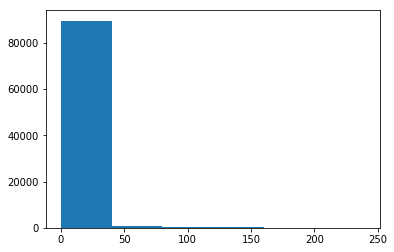

In [115]:
#compare the distribution of the waiting time until approval by professionally certified or not.

import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline

nyc_jobs["prof_cert_bin"] = nyc_jobs["Professional Cert"].map(lambda x: 1 if x=="Y" else 0)

newdf = nyc_jobs.dropna(subset=['days_to_approve', 'cost_est'])

profcert = newdf[newdf["prof_cert_bin"]==1]
no_prof_cert = newdf[newdf["prof_cert_bin"]==0]

plt.hist(profcert['days_to_approve'], bins=[0, 40, 80, 120, 160, 200, 240])

(array([38375., 11013.,  4632.,  2416.,  1472.,   941.]),
 array([  0,  40,  80, 120, 160, 200, 240]),
 <a list of 6 Patch objects>)

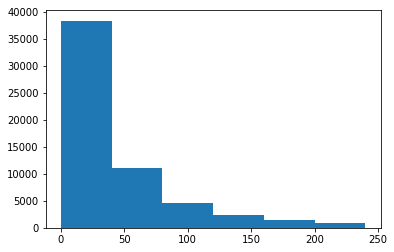

In [26]:
plt.hist(no_prof_cert['days_to_approve'], bins=[0, 40, 80, 120, 160, 200, 240])

We see that the distribution of days to approve professionaly certified approvals is much closer to 0 
than non-professionally certified approvals which are signfiicantly more skewed right.

In [14]:
ss.kendalltau(newdf["days_to_approve"], newdf["prof_cert_bin"])

KendalltauResult(correlation=-0.697979875893257, pvalue=0.0)

We see that the p-value is 0 so we can conclude we have sufficient eveidence to reject the null hypothesis that the waiting time until approval is independent of whether the application was professionally certified.

In [41]:
# 2 
# From Assignment 5 we see that all 5 have similar looking distributions visually

bronx = newdf[newdf["Borough"] == 'BRONX']
brooklyn = newdf[newdf["Borough"] == 'BROOKLYN']
manhattan = newdf[newdf["Borough"] == 'MANHATTAN']
queens = newdf[newdf["Borough"] == 'QUEENS']
staten_island = newdf[newdf["Borough"] == 'STATEN ISLAND']

ss.f_oneway(bronx["days_to_approve"], brooklyn["days_to_approve"], manhattan["days_to_approve"], 
            queens["days_to_approve"], staten_island["days_to_approve"])

F_onewayResult(statistic=131.5923115943286, pvalue=2.074679269922299e-112)

We see that the p-value is less than .05 so we can conclude we have sufficient eveidence to reject the null hypothesis
that the waiting times are the same across all boroughs

In [127]:
# 3

#Compare the distribution of the waiting time until approval by five equally sized groups ordered by the logarithm of the 
#estimated cost. Test the null hypothesis that the waiting time is independent of the estimated cost.

newdf['cost_est'] = pd.to_numeric(newdf['cost_est'])
newdf["log_init_cost"] = np.log10(newdf['cost_est'])
newdf['quantile'] = pd.qcut(newdf['log_init_cost'], q=5, labels=[1,2,3,4,5])

/Users/Ryan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Ryan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/Users/Ryan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys
/Users/Ryan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/Ryan/a

(array([27683.,  2117.,   898.,   538.,   273.,   203.]),
 array([  0,  40,  80, 120, 160, 200, 240]),
 <a list of 6 Patch objects>)

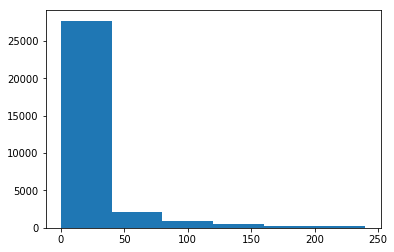

In [111]:

bin1 = newdf[newdf['quantile']==1]
plt.hist(bin1['days_to_approve'], bins=[0, 40, 80, 120, 160, 200, 240])

(array([22600.,  3837.,  1615.,   798.,   497.,   328.]),
 array([  0,  40,  80, 120, 160, 200, 240]),
 <a list of 6 Patch objects>)

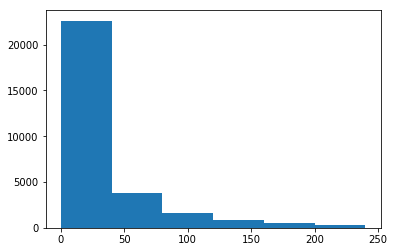

In [110]:
bin5 = newdf[newdf['quantile']==5]
plt.hist(bin5['days_to_approve'], bins=[0, 40, 80, 120, 160, 200, 240])

#Bin 1 and Bin 5 have similar looking shapes of their distributions but Bin1 has a many more data points from 0 to 40 than
# Bin 5

In [121]:
#x2b = pd.cut(newdf["days_to_approve"], bins = xbins, labels = [1,2,3,4,5])
newdf['daysquantile'] = pd.qcut(newdf['days_to_approve'], q=5, duplicates='drop')

xtab = pd.crosstab(newdf["quantile", newdf['daysquantile']])
chi2, p, dof, ex = ss.chi2_contingency(xtab)

/Users/Ryan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [126]:
#4

#Build a linear regression model to predict the waiting time until approval with all 
#the covariates you have created. Interpret your results.
import statsmodels.api as sm

X = newdf[['cost_est']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
Y = newdf['days_to_approve']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

/Users/Ryan/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


ImportError: cannot import name 'logsumexp'

#5 A meaningful question that can be answered by the data is predicting the total estimated fee column in the dataset by using different types of regression such as linear regression or using decision trees.

In [128]:
url = 'https://raw.githubusercontent.com/statds/ids-s22/main/notes/data/nyc_DobJobApp_2021.csv'

test = pd.read_csv(url)
test.head()

/Users/Ryan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (23,24,25,26,29,31,32,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
0,440673512,1,QUEENS,10040,222 STREET,10780,19,4231025,A2,R,...,N,NaN,A1,0,40.714365,-73.731171,27.0,568.0,Queens Village,4231025.0
1,440673497,1,QUEENS,215-02,93 AVENUE,10618,28,4226672,A2,X,...,N,NaN,A1,0,40.720067,-73.742696,23.0,542.0,Queens Village,4226672.0
2,340810947,1,BROOKLYN,770,RUGBY ROAD,6688,34,3178977,A2,R,...,N,NaN,A1,0,40.630504,-73.963353,45.0,528.0,Flatbush,3178977.0
3,340810910,1,BROOKLYN,39,RUTLAND ROAD,5034,90,3115124,A2,R,...,N,NaN,B3,0,40.658878,-73.959067,40.0,79801.0,Prospect Lefferts Gardens-Wingate,3115124.0
4,340810956,1,BROOKLYN,200,LINCOLN ROAD,5029,18,3114725,A2,X,...,N,NaN,A5,0,40.661240,-73.955847,40.0,800.0,Prospect Lefferts Gardens-Wingate,3114725.0
